In [6]:
import requests
import json
from bs4 import BeautifulSoup
import lxml
import pandas as pd
from highlight_text import fig_text
from mplsoccer import VerticalPitch,Pitch
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
import seaborn as sns
from adjustText import adjust_text
from urllib.request import urlopen
import matplotlib.pyplot as plt
from PIL import Image
from mplsoccer import Pitch, add_image
plt.style.use('default')
import matplotlib.font_manager as fm

In [7]:
url = "https://understat.com/match/18976"
r = requests.get(url)
soup = BeautifulSoup(r.content, 'lxml')
scripts = soup.find_all('script')
strings = scripts[1].string
ind_start = strings.index("('")+2
ind_end = strings.index("')")
json_data = strings[ind_start:ind_end]
json_data = json_data.encode('utf8').decode('unicode_escape')
json_data = json.loads(json_data)

title = soup.find_all('a')
title = title[5].text

In [8]:
Leagues = {'Ligue 1':"Ligue 1 uber eats",
    'EPL':"Premier League",
    'Serie A':"Serie A TIM",
    'La liga':"LaLiga Santander",
    'Bundesliga':"Bundesliga"}

Leagues_logos = {'Ligue 1':r"C:\Users\YahyaRashwan\Desktop\Logo_Ligue_1_Uber_Eats_2020.svg.png",
    'EPL':r"C:\Users\YahyaRashwan\Downloads\Premier-League-PNG-Image.png",
    'Serie A':r"C:\Users\YahyaRashwan\Desktop\se1113l151-serie-a-logo-lega-serie-a-european-leagues.png",
    'La liga':r"C:\Users\YahyaRashwan\Desktop\6893566_preview.png",
    'Bundesliga':r"C:\Users\YahyaRashwan\Desktop\bundesliga-home-events.png"}

if title in Leagues_logos.keys():
        league = Leagues[title]
        league_logo = Leagues_logos[title]
        print(league,": ",league_logo)

LaLiga Santander :  C:\Users\YahyaRashwan\Desktop\6893566_preview.png


In [9]:
logos = {
#La Liga 
            'Real Madrid':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Real-Madrid-CF-Logo.png",
            'Barcelona':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Barcelona-Logo.png",
            'Atletico Madrid':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Atlético-Madrid-Logo.png",    
            'Valencia':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Valencia-CF-Logo.png",
            'Sevilla':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Sevilla-FC-Logo.png",
            'Real Betis':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Real-Betis-Logo.png",
            'Real Sociedad':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Real-Sociedad-Logo.png",
            'Villareal':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Villarreal-CF-Logo.png",
            'Celta Vigo':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\RC-Celta-de-Vigo-Logo.png",
            'Cadiz':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Cádiz-CF-logo.png",
            'Elche':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Elche-CF-Logo.png",
            'Almeria':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\UD-Almería-Logo.png",
            'Real Valladolid':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Real-Valladolid-Logo.png",
            'Athletic Club':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Club-Athletic-Logo.png",
            'Rayo Vallecano':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Rayo-Vallecan-Logo.png",
            'Osasuna':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\CA-Osasuna-Logo.png",
            'Mallorca':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\RCD-Mallorca-Logo.png",
            'Girona':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Girona-FC-Logo.png",
            'Getafe':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\Getafe-logo.png",
            'Espanyol':r"C:\Users\YahyaRashwan\Desktop\club badges\La Liga\RCD-Espanyol-Logo.png",
#Ligue 1
            'Paris Saint Germain':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Paris-Saint-Germain-Logo.png",
            'Lille':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Lille-OSC-Logo.png",
            "Marseille":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Olympique-Marseille-Logo.png",
            "Lens":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Racing-Club-de-Lens-Logo.png",
            "Lyon":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Olympique-Lyonnais-Logo.png",
            "Clermont Foot":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Clermont_Foot_Auvergne_63-logo-35B18ECDA0-seeklogo.com.png",
            "Toulouse":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Toulouse-FC-Logo.png",
            "Brest":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Stade-Brestois-29-Logo.png",
            "Lorient":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\580b57fcd9996e24bc43c4ce.png",
            "Rennes":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Stade-Rennais-FC-Logo.png",
            "Auxerre":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\580b57fcd9996e24bc43c4c7.png",
            "Monaco":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\AS-Monaco-FC-Logo.png",
            "Montpellier":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Montpellier-HSC-Logo.png",
            "Strasbourg":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Racing-Club-de-Strasbourg-Logo.png",
            "Nantes":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\FC-Nantes-Logo.png",
            "Nice":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\OGC-Nice-Logo.png",
            "Angers":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Angers-SCO-Logo.png",
            "Ajaccio":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Gazélec-Ajaccio-Logo.png",
            "Reims":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\Stade-de-Reims-Logo.png",
            "Troyes":r"C:\Users\YahyaRashwan\Desktop\club badges\Serie 1\ES-Troyes-AC-.png",
#Serie A
            'Napoli': r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\SSC-Napoli-Logo.png",
            'Inter':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Internazionale-Logo.png",
            'Roma':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\AS-Roma-1927-Logo.png",
            'Juventus':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Juventus-FC-Logo.png",
            'AC Milan':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\AC-Milan-Logo.png",
            'Atalanta':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Atalanta-BC-Logo.png",
            'Fiorentina':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\ACF-Fiorentina-logo.png",
            'Lazio':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\SS-Lazio-Logo.png",
            'Torino':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Torino-FC-1906-Logo.png",
            'Sassuolo':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Sassuolo-Calcio-Logo.png",
            'Spezia':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Spezia-Calcio-Logo.png",
            'Bologna':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Bologna-FC-1909-Logo.png",
            'Empoli':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Empoli-FC-Logo.png",
            'Salernitana':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\US_Salernitana_1919_logo.svg.png",
            'Udinese':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Udinese-Calcio-LOgo.png",
            'Sampdoria':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\UC-Sampdoria-Logo.png",
            'Verona':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\hellas-verona-logo.png",
            'Cremonese':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\315709.png",
            'Lecce':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\US-Lecce-1908-Logo.png",
            'Monza':r"C:\Users\YahyaRashwan\Desktop\club badges\Serie A\Logo_of_AC_Monza.png",
#EPL
            'Arsenal': r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\arsenal-fc-logo.png",
            'Manchester City':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\manchester-city-fc-logo.png",
            'Tottenham':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\tottenham-hotspur-fc-logo.png",
            'Leeds':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\Leeds-United-FC-Logo.png",
            'Brighton':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\brighton-and-hove-albion-fc-logo.png",
            'Newcastle United':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\newcastle-united-fc-logo.png",
            'Fulham':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\fulham-fc-logo.png",
            'Brentford':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\brentford-fc-logo-E928FFBD93-seeklogo.com (1).png",
            'Crystal Palace':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\crystal-palace-fc-logo.png",
            'Nottingham Forest':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\318662.png",
            'Southampton':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\Southampton-FC-Logo.png",
            'Chelsea':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\chelsea-fc-logo.png",
            'Aston Villa':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\Aston-Villa-FC-Logo.png",
            'Manchester United':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\manchester-united-fc-logo.png",
            'Bournemouth':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\afc-bournemouth-logo.png",
            'Liverpool':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\liverpool-fc-logo.png",
            'Everton':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\everton-fc-logo.png",
            'Wolverhampton Wanderers':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\wolverhampton-wanderers-fc-logo.png",
            'Leicester':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\leicester-city-fc-logo.png",
            'West Ham':r"C:\Users\YahyaRashwan\Desktop\club badges\EPL\west-ham-united-fc-logo.png",
#Bundesliga
            'Bayern Munich': r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Bayern-Munich-logo.png",
            'Borussia M.Gladbach':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Borussia-Mönchengladbach-Logo.png",
            'Union Berlin':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\1.-FC-Union-Berlin-Logo.png",
            'Mainz 05':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Mainz-05-logo.png",
            'Freiburg':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\SC-Freiburg-logo.png",
            'Hoffenheim':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\1899-Hoffenheim-logo.png",
            'Borussia Dortmund':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Borussia-Dortmund-logo.png",
            'FC Cologne':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\1.-FC-Köln-logo.png",
            'Werder Bremen':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Werder-Bremen-Logo.png",
            'Augsburg':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\FC-Augsburg-logo.png",
            'RasenBallsport Leipzig':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\RB-Leipzig-logo.png",
            'VfB Stuttgart':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\VfB-Stuttgart-Logo.png",
            'Schalke 04':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Schalke-0-Logo.png",
            'Wolfsburg':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\VfL-Wolfsburg-Logo.png",
            'Eintracht Frankfurt':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Eintracht-Frankfurt-logo.png",
            'Hertha Berlin':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Hertha-BSC-logo.png",
            'Bayer Leverkusen':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\Bayer-Leverkusen-logo.png",
            'Bochum':r"C:\Users\YahyaRashwan\Desktop\club badges\Bundesliga\VfL_Bochum_logo.svg.png"
            }

In [10]:
h_minutes = [json_data['h'][i]['minute'] for i in range(len(json_data['h']))]
h_X = [json_data['h'][i]['X'] for i in range(len(json_data['h']))]
h_Y = [json_data['h'][i]['Y'] for i in range(len(json_data['h']))]
h_xG = [json_data['h'][i]['xG'] for i in range(len(json_data['h']))]
h_player_name = [json_data['h'][i]['player'] for i in range(len(json_data['h']))]
h_assisted_by = [json_data['h'][i]['player_assisted'] for i in range(len(json_data['h']))]
h_player_id = [json_data['h'][i]['player_id'] for i in range(len(json_data['h']))]
h_player_team = [json_data['h'][i]['h_team'] for i in range(len(json_data['h']))]
h_situation = [json_data['h'][i]['situation'] for i in range(len(json_data['h']))]
h_result = [json_data['h'][i]['result'] for i in range(len(json_data['h']))]
h_last_action = [json_data['h'][i]['lastAction'] for i in range(len(json_data['h']))]


df_home = pd.DataFrame({'minute':h_minutes,'X':h_X,'Y':h_Y,'xG':h_xG,'player':h_player_name,'player_id':h_player_id,'Assist':h_assisted_by,'player_team':h_player_team,'situation':h_situation,"last action":h_last_action,'Output':h_result})

df_home['minute'] = df_home['minute'].astype(int)
df_home['X'] = df_home['X'].astype(float).round(2)
df_home['Y'] = df_home['Y'].astype(float).round(2)
df_home['xG'] = df_home['xG'].astype(float).round(2)
df_home['minute'] = df_home['minute'].astype(int)

df_home.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost'],
                      ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post'],inplace=True)
df_home['situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                            ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

df_home['last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                               ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

for i in range(len(df_home)):
    df_home['X'][i] = df_home['X'][i]*120 - 0.3
    df_home['Y'][i] = df_home['Y'][i]*80

home_team = df_home['player_team'].unique()[0]
home_score = df_home[df_home['Output'] == 'Goal'].shape[0]
home_score_xg = df_home['xG'].sum()
home_score_xg = round(home_score_xg,2)

In [11]:
a_minutes = [json_data['a'][i]['minute'] for i in range(len(json_data['a']))]
a_X = [json_data['a'][i]['X'] for i in range(len(json_data['a']))]
a_Y = [json_data['a'][i]['Y'] for i in range(len(json_data['a']))]
a_xG = [json_data['a'][i]['xG'] for i in range(len(json_data['a']))]
a_player_name = [json_data['a'][i]['player'] for i in range(len(json_data['a']))]
a_assisted_by = [json_data['a'][i]['player_assisted'] for i in range(len(json_data['a']))]
a_player_id = [json_data['a'][i]['player_id'] for i in range(len(json_data['a']))]
a_player_team = [json_data['a'][i]['a_team'] for i in range(len(json_data['a']))]
a_situation = [json_data['a'][i]['situation'] for i in range(len(json_data['a']))]
a_result = [json_data['a'][i]['result'] for i in range(len(json_data['a']))]
a_last_action = [json_data['a'][i]['lastAction'] for i in range(len(json_data['a']))]

df_away = pd.DataFrame({'minute':a_minutes,'X':a_X,'Y':a_Y,'xG':a_xG,'player':a_player_name,'Assist':a_assisted_by,'player_id':a_player_id,'player_team':a_player_team,'situation':a_situation,'last action':a_last_action,'Output':a_result})

df_away['minute'] = df_away['minute'].astype(int)
df_away['X'] = df_away['X'].astype(float).round(2)
df_away['Y'] = df_away['Y'].astype(float).round(2)
df_away['xG'] = df_away['xG'].astype(float).round(2)
df_away['minute'] = df_away['minute'].astype(int)

for i in range(len(df_away)):
    df_away['X'][i] = df_away['X'][i]*120 - 0.3
    df_away['Y'][i] = df_away['Y'][i]*80


df_away.Output.replace(['MissedShots','SavedShot', 'BlockedShot','ShotOnPost'],
                      ['Missed Shot','Saved Shot', 'Blocked Shot', 'Shot On Post'],inplace=True)
df_away['situation'].replace(['OpenPlay','DirectFreekick','FromCorner','SetPiece'],
                            ['Open Play','Direct Free kick','From Corner','Set Piece'] ,inplace=True)

df_away['last action'].replace(['BallRecovery', 'TakeOn','Throughball','LayOff', 'HeadPass','BallTouch','BlockedPass'],
                               ['Ball Recovery', 'Take On','Through ball','Lay Off', 'Head Pass','Ball Touch','Blocked Pass'],inplace=True)

"""""df['Shot type'].replace(['LeftFoot', 'RightFoot','OtherBodyPart'],
                            ['Left Foot','Right Foot' ,'Other Body Part'] ,inplace=True)"""""


away_team = df_away['player_team'].unique()[0]
away_score = df_away[df_away['Output'] == 'Goal'].shape[0]
away_score_xg = df_away['xG'].sum()
away_score_xg = round(away_score_xg,2)
away_score_xg 

3.94

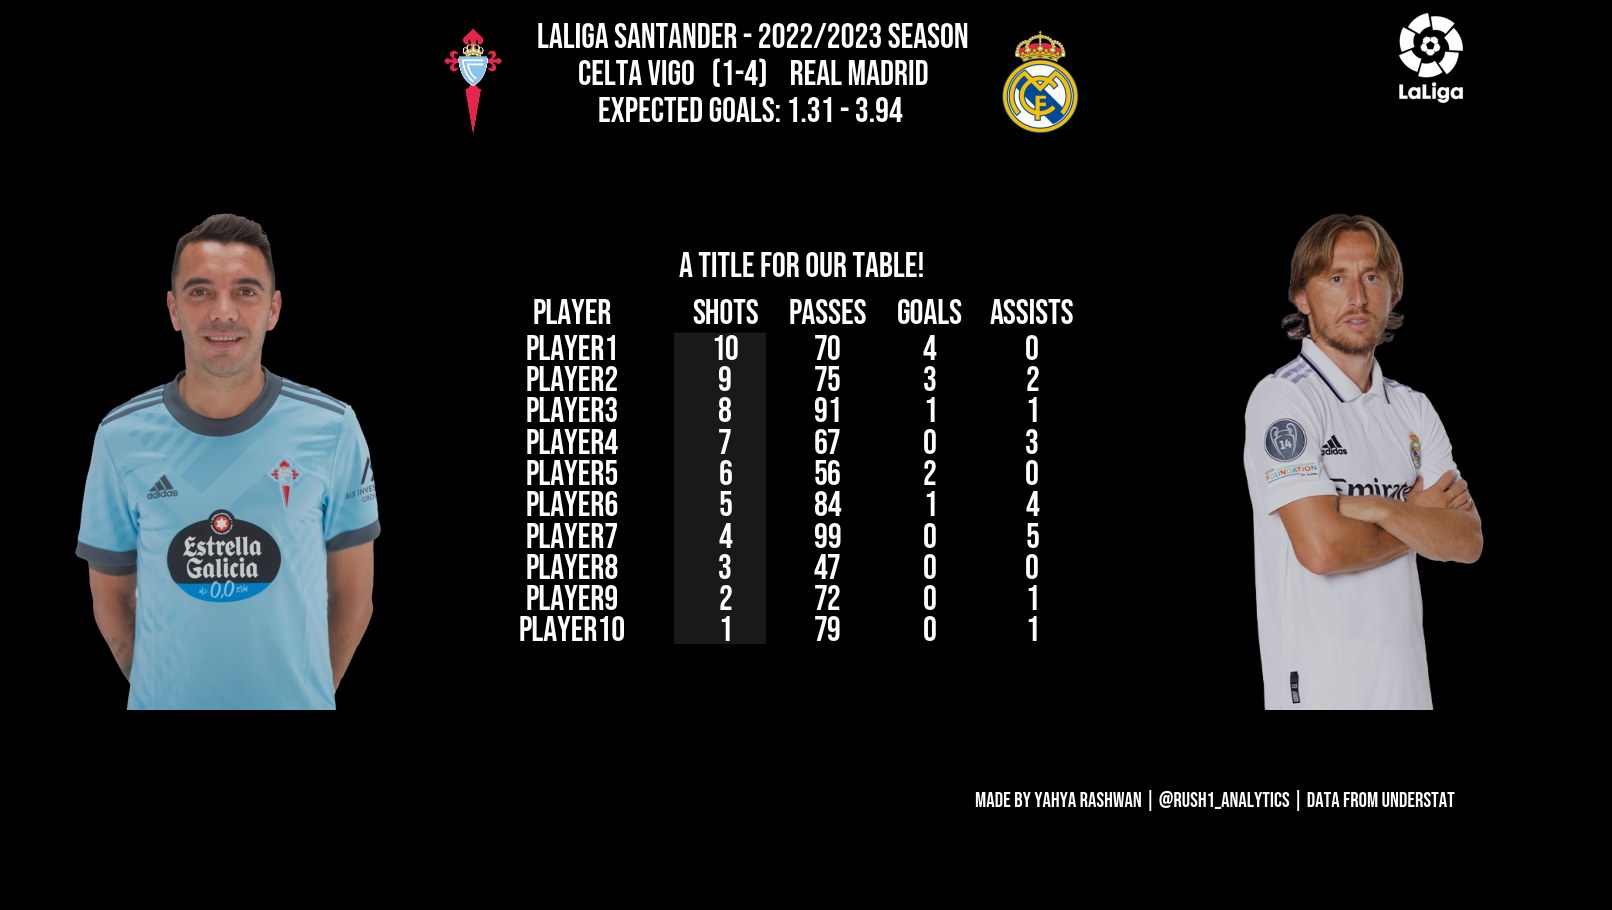

In [14]:
import matplotlib.pyplot as mpl
import matplotlib.patches as patches

background = 'black'
text_color = 'white'

plt.style.use('dark_background')

mpl.rcParams['xtick.color']=text_color
mpl.rcParams['ytick.color']=text_color
mpl.rcParams['axes.labelcolor']='black'
mpl.rcParams['text.color']=text_color
mpl.rcParams['legend.fontsize'] = 15

path = r"C:\Users\YahyaRashwan\Desktop\1d8761b0-9410-11e9-ba67-ebab80fd2244.otf"
fontprop = fm.FontProperties(fname=path, size=60, weight='bold', style='normal', stretch='normal')
fontprop2 = fm.FontProperties(fname=path, size=25, weight='bold', style='normal', stretch='normal')
fontprop3 = fm.FontProperties(fname=path, size=6.5*3, weight='bold', style='normal', stretch='normal')

fig, ax = plt.subplots(figsize=(6*2.5,4*2.5))
ax.axis('off')

HomeLogo = fig.add_axes((0.26, 0.875,0.125*0.85,0.125*0.85))
HomeLogo.patch.set_facecolor(background)
HomeLogo.axis('off')

if home_team in logos:
    im = plt.imread(logos[home_team])
    HomeLogo.imshow(im)
else:
    pass


AwayLogo = fig.add_axes((0.6375, 0.875,0.125*0.85,0.125*0.85))
AwayLogo.patch.set_facecolor(background)
AwayLogo.axis('off')
if away_team in logos:
    im = plt.imread(logos[away_team])
    AwayLogo.imshow(im)
else:
    pass

LeagueLogo = fig.add_axes((0.905, 0.905,0.125*0.75,0.125*0.75))
LeagueLogo.patch.set_facecolor(background)
LeagueLogo.axis('off')
im = plt.imread(league_logo)
LeagueLogo.imshow(im)

MatchInfo = fig.add_axes((0.375, 0.875,0.125*2,0.125))
MatchInfo.patch.set_facecolor(background)
MatchInfo.axis('off')
MatchInfo.text(0.5, 0.8, f'{league} - 2022/2023 Season',ha='center', va='center', color=text_color,fontproperties=fontprop2)
MatchInfo.text(0.5, 0.5, f'{home_team}   ({home_score}-{away_score})    {away_team}',ha='center', va='center', color=text_color,fontproperties=fontprop2)
MatchInfo.text(0.5, 0.2, f'Expected Goals: {home_score_xg} - {away_score_xg} ',ha='center', va='center', color=text_color,fontproperties=fontprop2)

PlayerHome = fig.add_axes((0.675,0.3,0.125*4,0.125*4))
PlayerHome.patch.set_facecolor(background)
PlayerHome.axis('off')
im = plt.imread(r"C:\Users\YahyaRashwan\Downloads\MODRIC_550x650.png")
PlayerHome.imshow(im,alpha=0.85)

PlayerAway = fig.add_axes((-.1,0.3,0.125*4,0.125*4))
PlayerAway.patch.set_facecolor(background)
PlayerAway.axis('off')
im = plt.imread(r"C:\Users\YahyaRashwan\Downloads\10-IAGO-ASPAS_LARGO-AIX.png")
PlayerAway.imshow(im,alpha=0.85)

Table = fig.add_axes(((0.345,0.35,0.125*3,0.125*3)))

rows = 10
cols = 5

Table.set_ylim(-1, rows + 1)
Table.set_xlim(0, cols + .5)

data = [
        {'id': 'player10', 'shots': 1, 'passes': 79, 'goals': 0, 'assists': 1},
        {'id': 'player9', 'shots': 2, 'passes': 72, 'goals': 0, 'assists': 1},
        {'id': 'player8', 'shots': 3, 'passes': 47, 'goals': 0, 'assists': 0},
        {'id': 'player7', 'shots': 4, 'passes': 99, 'goals': 0, 'assists': 5},
        {'id': 'player6', 'shots': 5, 'passes': 84, 'goals': 1, 'assists': 4},
        {'id': 'player5', 'shots': 6, 'passes': 56, 'goals': 2, 'assists': 0},
        {'id': 'player4', 'shots': 7, 'passes': 67, 'goals': 0, 'assists': 3},
        {'id': 'player3', 'shots': 8, 'passes': 91, 'goals': 1, 'assists': 1},
        {'id': 'player2', 'shots': 9, 'passes': 75, 'goals': 3, 'assists': 2},
        {'id': 'player1', 'shots': 10, 'passes': 70, 'goals': 4, 'assists': 0}
]

for row in range(rows):
    d = data[row]
    Table.text(x=.5, y=row, s=d['id'], va='center', ha='center',  weight='bold', fontsize=25,fontproperties= fontprop3)
    Table.text(x=2, y=row, s=d['shots'], va='center', ha='center',fontproperties= fontprop3,fontsize=25)
    Table.text(x=3, y=row, s=d['passes'], va='center', ha='center',fontproperties= fontprop3, fontsize=25)
    Table.text(x=4, y=row, s=d['goals'], va='center', ha='center',fontproperties= fontprop3, fontsize=25)
    Table.text(x=5, y=row, s=d['assists'], va='center', ha='center',fontproperties= fontprop3, fontsize=25)

Table.text(.5, 9.75, 'Player', weight='bold', ha='center',fontproperties= fontprop3, fontsize=25)
Table.text(2, 9.75, 'Shots', weight='bold', ha='center',fontproperties= fontprop3, fontsize=25)
Table.text(3, 9.75, 'Passes', weight='bold', ha='center',fontproperties= fontprop3, fontsize=25)
Table.text(4, 9.75, 'Goals', weight='bold', ha='center',fontproperties= fontprop3, fontsize=25)
Table.text(5, 9.75, 'Assists', weight='bold', ha='center',fontproperties= fontprop3, fontsize=25)

for row in range(rows):

    Table.plot(
    	[0, cols + 1],
    	[row -.5, row - .5],
    	ls=':',
    	lw='0.05',
    	c='red'
    )

Table.plot([0, cols + 1], [9.5, 9.5], lw='0.5', c='black')

rect = patches.Rectangle(
	(1.5, -.5),  # bottom left starting position (x,y)
	.9,
	10,
	ec='none',
	fc='grey',
	alpha=.2,
	zorder=-1
)
Table.add_patch(rect)

Table.axis('off')

Table.set_title(
	'A title for our table!',
	loc='center',
	fontsize=25,
    fontproperties= fontprop3,
	weight='bold'
)

ax.text(0.675, 0.1205, 'Made by Yahya Rashwan | @Rush1_Analytics | Data from understat', fontsize = 15,fontproperties=fontprop3)

plt.savefig(rf"C:\Users\YahyaRashwan\Desktop\trials\TemplateTrial.png",dpi=300)

plt.show()
